In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,6)})

from statsmodels.tsa.arima_model import ARMA

In [2]:
temp_data = pd.read_csv('city_temperatures.csv')
temp_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [3]:
## separating one country data
temp_data = temp_data.dropna()
df_Germany = temp_data[temp_data['Country'] == 'Germany']

## making date column as index
df_Germany.index = pd.to_datetime(df_Germany.dt)

## droping other features and making a time series
ts = df_Germany.drop(['dt','AverageTemperatureUncertainty','City','Country','Latitude','Longitude'],axis=1)

In [5]:
ts.head()

,AverageTemperature
dt,
1743-11-01,6.326
1744-04-01,9.536
1744-05-01,12.579
1744-06-01,14.809
1744-07-01,17.275


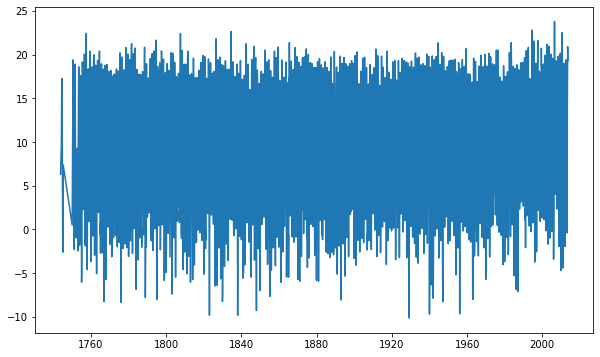

In [10]:
## ploting the time series
plt.plot(ts)

### Note : we can not see the data is stationary or not because there is not clearly visibling the trend and seasional component.

# Check data Stationary or not
1. rolling average
2. Dickey-fuller test adfuller

## 1. Rolling average

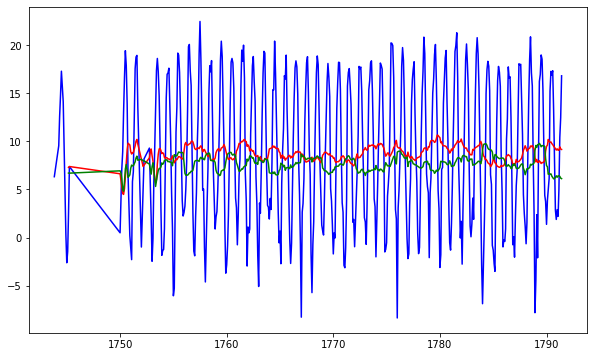

In [20]:
rolling_mean = ts.rolling(window=12).mean()
rolling_std = ts.rolling(window=12).std()

plt.plot(ts[:500] ,  color='blue')
plt.plot(rolling_mean[:500], color='red')
plt.plot(rolling_std[:500] , color='green')

## Note:
1. here we can see the rolling mean and rolling average is prety much similar so we can say the data is stationary.

## 2. Dickey-fuller test adfuller

In [22]:
from statsmodels.tsa.stattools import adfuller 

In [28]:
## ADF test - 
## null hypothesis - not stationary if p value < 0.05 then reject the null hypothesis
adfuller_result = adfuller(ts, autolag='AIC')

print(f'ADF Statistic : {adfuller_result[0]}')
print(f'p value : {adfuller_result[1]}')

for key,value in adfuller_result[4].items():
    print("Critical values:")
    print(f' {key}:{value})')
    
p_value = adfuller_result[1]
if p_value < 0.05:
    print("\nreject the null hypothesis and series is stationary")
else:
    print("\naccept the null hypothesis and series is not stationary")
    

ADF Statistic : -8.295430964421119
p value : 4.1524866662049e-13
Critical values:
 1%:-3.432436279580521)
Critical values:
 5%:-2.8624617895332967)
Critical values:
 10%:-2.5672606902905657)

reject the null hypothesis and series is stationary


## Conclusion:
1. both the test give us a conclusion : series is stationary so we can directly apply the model to it

## Model training
1. ARMA model 
2. ARIMA model

In [29]:
from statsmodels.tsa.arima_model import ARMA

In [59]:
# first model
ARMA_model = ARMA(ts , order=(1,1)) # AR=1 , MA =1
ARMA_model_fit = ARMA_model.fit()

G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [60]:
# predicted 1 year data
y_pred = ARMA_model_fit.predict('2012-08-01','2013-08-01')

In [61]:
# actual one year data
actuals = df_Germany['2012-08-01':'2013-08-01']['AverageTemperature']

In [64]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_pred,actuals)
print(f"MSE: {mse}")

MSE: 2.814579491036139


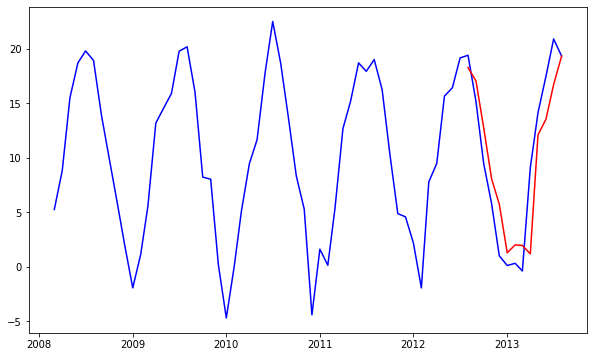

In [81]:
plt.plot(ts[3100:] ,color='blue')
plt.plot(y_pred,color='red')

## what is best AR and MA for our time series

In [85]:
## less vaalue of aic is good and we take that parameter
import itertools
i = j = range(0,4)
ij = itertools.product(i,j)
for params in ij:
    try:
        mod = ARMA(ts,order=params)
        result = mod.fit()
        print(f"ARMA: {params} - ATC: {result.aic}")
    except:
        continue

G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

ARMA: (0, 0) - ATC: 21536.598975186014
ARMA: (0, 1) - ATC: 18988.129390918046
ARMA: (0, 3) - ATC: 17082.39712759008
ARMA: (1, 0) - ATC: 18029.214184424083


G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA: (1, 1) - ATC: 17385.14625419487


G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA: (1, 2) - ATC: 18934.3134071386


G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA: (1, 3) - ATC: 17621.988247215966


G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA: (2, 0) - ATC: 16557.181506310004


G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA: (2, 2) - ATC: 13845.815219201599


G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA: (2, 3) - ATC: 13651.330465281768


G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA: (3, 0) - ATC: 15436.340127119161


G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA: (3, 2) - ATC: 13617.147056858896


G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA: (3, 3) - ATC: 13615.105176962861


In [87]:
## so we take ARMA (3,3) and this model is stored in result now make predications
new_y_pred = result.predict('2012-08-01','2013-08-01')

In [88]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(new_y_pred,actuals)
print(f"MSE: {mse}")

MSE: 1.170208762967615


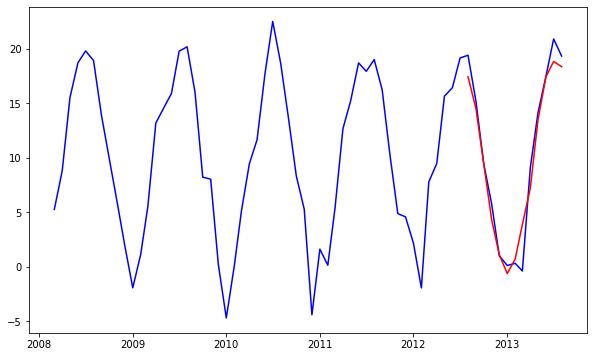

In [90]:
plt.plot(ts[3100:] ,color='blue')
plt.plot(new_y_pred,color='red')